In [2]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

# !pip install streamlit -q  

In [3]:
# load data
dat = pd.read_csv('Daily-Standup-update-Lingyue_2023.csv')
# select the Date in Jan 2023
dat = dat[dat['Date'].str.contains('2023-1-')]
dat["Date"] = pd.to_datetime(dat["Date"], format="%Y-%m-%d")

# fill the missing values with 0 for all numerical columns
dat = dat.fillna(0)
dat.head()

,WeekCount,Date,Weekday,Task1,Manuscript1,TaskType1,PlannedTime1 (h),AccomplishState1 (%),SpentTime1 (h),WordCount1,...,AccomplishState2 (%),SpentTime2 (h),WordCount2,ParagraphCount2,TotalWordCount,TotalParagraphCount,ExtraEvent,ExtraTime (h),ProductivityRating (1-5),GeneralOverview
0,1,2023-01-01,Sunday,"Exp 2 Result figures\nExp 2.1, Exp 2.2, betwee...",M1,DataAnalysis / Plotting,3.0,100,6.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,4.0,Three in the seven newly collected online data...
1,1,2023-01-02,Monday,Exp 2\nOne more data --> final result figures\...,M1,DataAnalysis / Plotting,2.5,80,2.0,0,...,10.0,1.0,0.0,0.0,0.0,0.0,Visit Ambros & Susi,7.0,4.0,"Results all ready, need to combin the figures ..."
2,1,2023-01-03,Tuesday,Finalize the result figure\nExp2 result revisi...,M1,Revising,4.0,20,1.5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.5,"Too tired to work properly, slept several hour..."
3,1,2023-01-04,Wednesday,Finalize the result figure\nExp2 result revisi...,M1,Revising,4.0,80,5.8,120,...,0.0,0.0,0.0,0.0,120.0,1.5,0,0.0,4.2,Spent longer time on general revision than exp...
4,1,2023-01-05,Thursday,General revising on remaining comments and met...,M1,Revising,3.0,30,4.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,3.8,More unexpected working load in tiny comments\...


# All in one plot over time

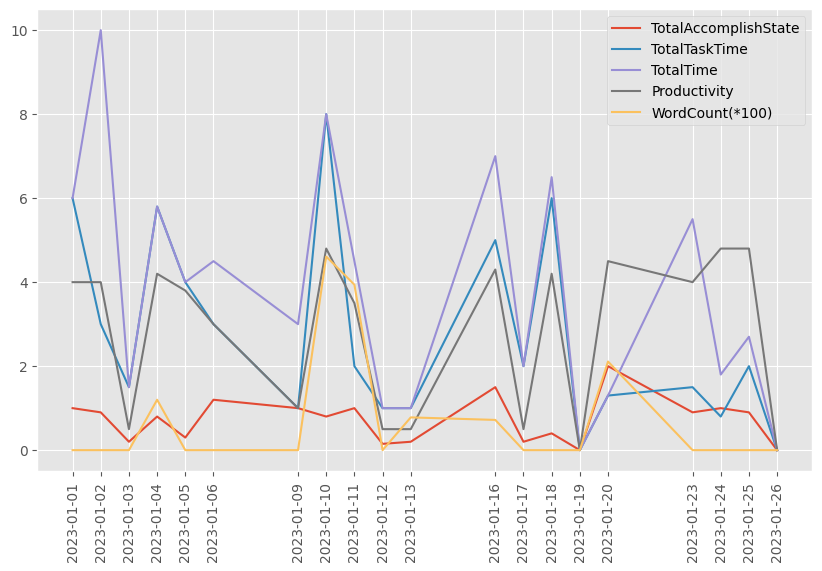

In [5]:
# plot the total AccomplishState of each day
# overlay the total task time spent on each task for each day
# overlay the task time + extra time spent on each task for each day
# overlay the productivity for each day
dat['TotalAccomplishState'] = dat["AccomplishState1 (%)"] + dat["AccomplishState2 (%)"]
dat['TotalTaskTime'] = dat["SpentTime1 (h)"] + dat["SpentTime2 (h)"]
dat['TotalTime'] = dat["TotalTaskTime"] + dat["ExtraTime (h)"]

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(dat['Date'], dat['TotalAccomplishState']/100, label='TotalAccomplishState')
ax.plot(dat['Date'], dat['TotalTaskTime'], label='TotalTaskTime')
ax.plot(dat['Date'], dat['TotalTime'], label='TotalTime')
ax.plot(dat['Date'], dat['ProductivityRating (1-5)'], label='Productivity')
ax.plot(dat['Date'], dat['TotalWordCount']/100, label='WordCount(*100)')

plt.legend()
plt.xticks(dat['Date'], rotation=90)
plt.show()

# Focus on tasks

In [4]:
# split the df into twp df: date, task1, task2
dat_task_1 = dat[['WeekCount', 'Date', 'Weekday', 
                        'Task1','Manuscript1', 'TaskType1', 'AccomplishState1 (%)', 'SpentTime1 (h)']]

dat_task_2 = dat[['WeekCount', 'Date', 'Weekday', 
                        'Task2', 'Manuscript2', 'TaskType2', 'AccomplishState2 (%)', 'SpentTime2 (h)']]

# remove the numbers in the column names of dat_task_1
dat_task_1.columns = ['WeekCount', 'Date', 'Weekday', 'Task','Manuscript', 'Type', 'Progress/%', 'SpentTime/h']
dat_task_1['TaskIndex'] = 'Task1'

dat_task_2.columns = ['WeekCount', 'Date', 'Weekday', 'Task', 'Manuscript', 'Type', 'Progress/%', 'SpentTime/h']
dat_task_2['TaskIndex'] = 'Task2'
# concat the two df vertically
dat_task = pd.concat([dat_task_1, dat_task_2], axis=0)

dat_task.sort_values(by=['WeekCount', 'Date', 'TaskIndex'], inplace=True)

# replace nan in Type with 'Others'
# dat['Type'].fillna('Others', inplace=True)

dat_task.head()

/var/folders/fl/4b_jqvfn04s7k0xkwng1489c0000gr/T/ipykernel_65363/2354316937.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_task_1['TaskIndex'] = 'Task1'
/var/folders/fl/4b_jqvfn04s7k0xkwng1489c0000gr/T/ipykernel_65363/2354316937.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_task_2['TaskIndex'] = 'Task2'


,WeekCount,Date,Weekday,Task,Manuscript,Type,Progress/%,SpentTime/h,TaskIndex
0,1,2023-01-01,Sunday,"Exp 2 Result figures\nExp 2.1, Exp 2.2, betwee...",M1,DataAnalysis / Plotting,100.0,6.0,Task1
0,1,2023-01-01,Sunday,"General revising\nClean up tiny comments, read...",M1,Revising,0.0,0.0,Task2
1,1,2023-01-02,Monday,Exp 2\nOne more data --> final result figures\...,M1,DataAnalysis / Plotting,80.0,2.0,Task1
1,1,2023-01-02,Monday,Exp2 result revising\nGeneral revising,M1,Revising,10.0,1.0,Task2
2,1,2023-01-03,Tuesday,Finalize the result figure\nExp2 result revisi...,M1,Revising,20.0,1.5,Task1


## Components of tasks

<AxesSubplot: ylabel='Manuscript'>

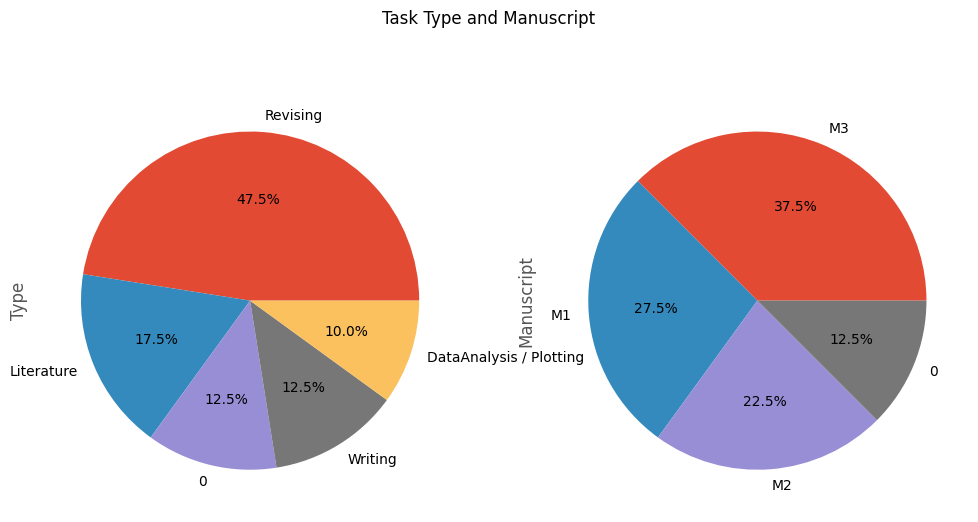

In [18]:
fig, axes = plt.subplots(figsize=(12, 6), ncols=2)
plt.suptitle('Task Type and Manuscript')
# pie chart of the Task Type 

dat_task['Type'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0])

# pie chart of manuscripts
dat_task['Manuscript'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[1])

## Accomplish states

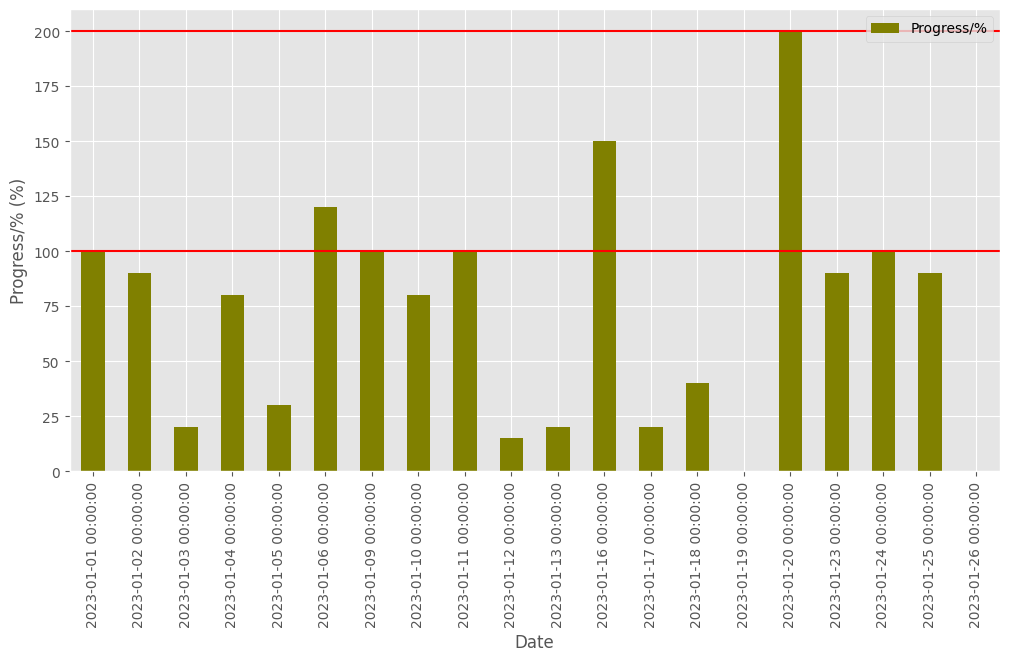

In [19]:
dat_state = dat_task[["Date", "Weekday", "TaskIndex", "Progress/%"]]

# replace nan with 0
dat_state = dat_state.replace(np.nan, 0)

# remove % sign in the column 'Progress/%'
# dat_state['Progress/%'] = dat_state['Progress/%'].str.replace('%', '')

# convert the column 'Progress/%' to float
# dat_state['Progress/%'] = dat_state['Progress/%'].astype(float)

# plot the accomplish state of each day as bars
fig, ax = plt.subplots(figsize=(12, 6))
dat_state_by_date = dat_state[["Date", "Progress/%"]].groupby("Date").sum().reset_index()
dat_state_by_date[["Date", "Progress/%"]].plot(x="Date", y=["Progress/%"], kind="bar", rot=90, ax=ax, color='olive')
plt.ylabel('Progress/% (%)')

# plot two horizontal lines indicate 100% and 200%
plt.axhline(y=100, color='r', linestyle='-')
plt.axhline(y=200, color='r', linestyle='-')


/var/folders/fl/4b_jqvfn04s7k0xkwng1489c0000gr/T/ipykernel_14308/2258318980.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.catplot(x="Weekday", y="Progress/%", hue="TaskIndex", kind="bar", data=dat_state, ci=68, height=6, aspect=1.5)


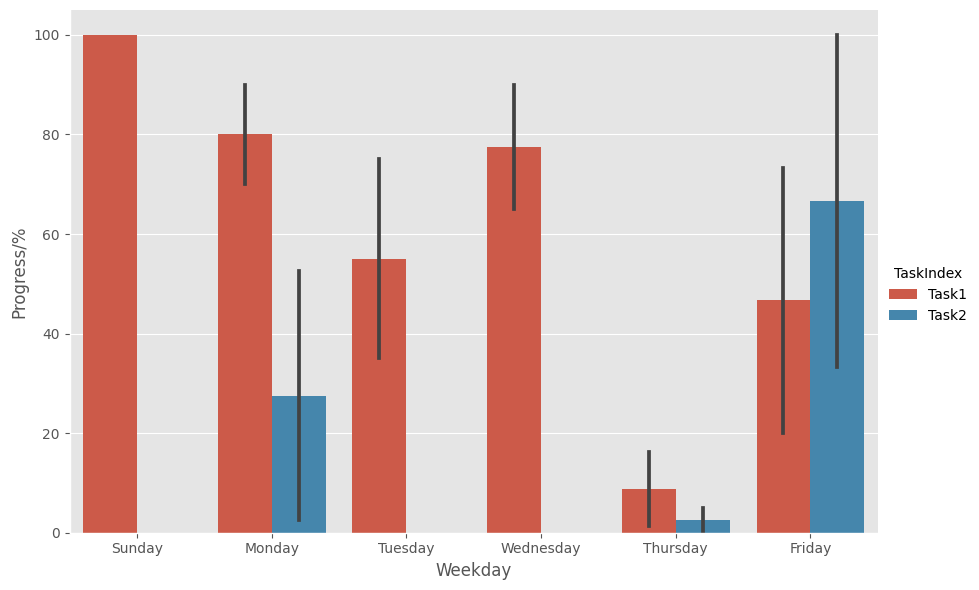

In [21]:
# plot the accomplish state of each day as bars
# fig, ax = plt.subplots(figsize=(12, 6))
# dat_yn_state_by_weekday = dat_yn_state[["Weekday", "TaskIndex", "Progress/%"]].groupby(["Weekday", "TaskIndex"]).mean().reset_index()
# dat_yn_state_by_weekday.pivot(index="Weekday", columns= "TaskIndex", values="Progress/%").plot( kind="bar", rot=90, ax=ax)
# plt.ylabel('Progress/% (%)')

# plot two horizontal lines indicate 100% and 200%
# plt.axhline(y=100, color='r', linestyle='-')

sns.catplot(x="Weekday", y="Progress/%", hue="TaskIndex", kind="bar", data=dat_state, ci=68, height=6, aspect=1.5)

## Lingering tasks

In [22]:
# find repeated tasks in the task column for each manuscript
dat_task.groupby(['Manuscript', 'Type'])['Task'].value_counts().reset_index(name='count').sort_values(by='count', ascending=False)

,Manuscript,Type,Task,count
0,0,0,0,5
3,M1,Revising,Finalize the result figure\nExp2 result revisi...,2
25,M3,Revising,Result checking,2
21,M3,Literature,Evergreen note\ngeneral structure\nSensorimoto...,2
11,M2,Revising,Check all comments\nadd summary & reference\nG...,2
12,M2,Revising,Discussion,2
20,M3,Literature,Evergreen note,2
17,M2,Writing,Discussion\nGeneral bias additional paragraph,1
28,M3,Writing,Discussion Part 1/8,1
27,M3,Writing,Discussion Part 1/4,1


# Word counts

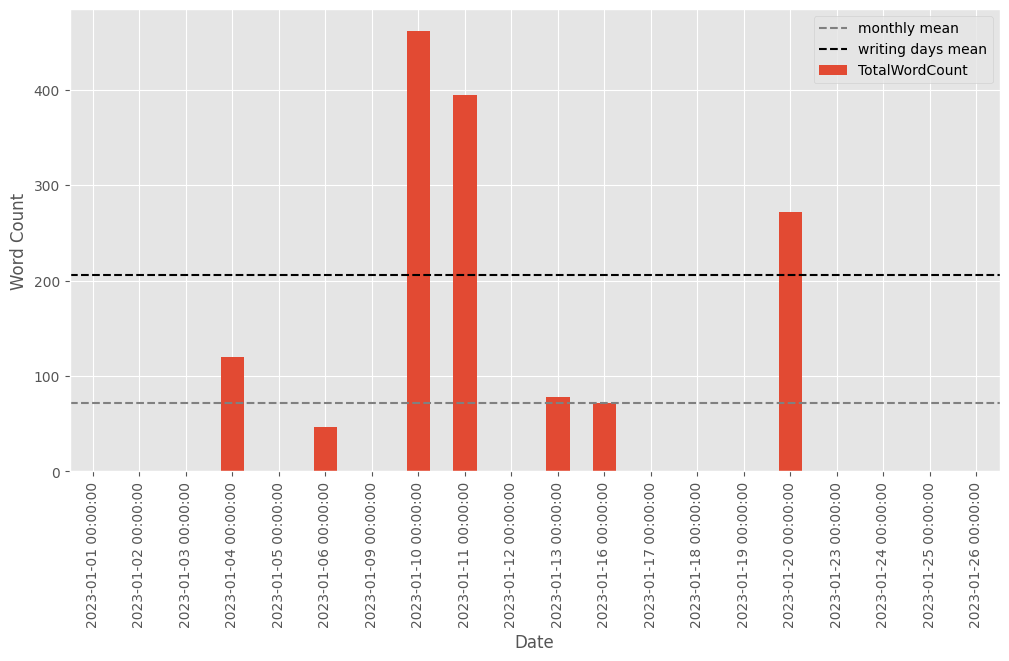

In [25]:
# bar plot Totalwordcount of each day
fig, ax = plt.subplots(figsize=(12, 6))
dat['TotalWordCount'] = dat['WordCount1'] + dat['WordCount2']
dat_raw_wc = dat[["Date", "TotalWordCount"]].groupby("Date").sum().reset_index().sort_values(by='Date')
dat_raw_wc[["Date", "TotalWordCount"]].plot(x="Date", y=["TotalWordCount"], kind="bar", rot=90, ax=ax)
plt.axhline(y=dat_raw_wc['TotalWordCount'].mean(), color='gray', linestyle='--', label='monthly mean')
plt.axhline(y=dat_raw_wc.query("TotalWordCount!=0")['TotalWordCount'].mean(), color='black', linestyle='--', label='writing days mean')

plt.ylabel('Word Count')
plt.legend()

/var/folders/fl/4b_jqvfn04s7k0xkwng1489c0000gr/T/ipykernel_14308/3808213896.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.catplot(x="Weekday", y="TotalWordCount", kind="bar", data=dat, ci=95, height=6, aspect=1.5)


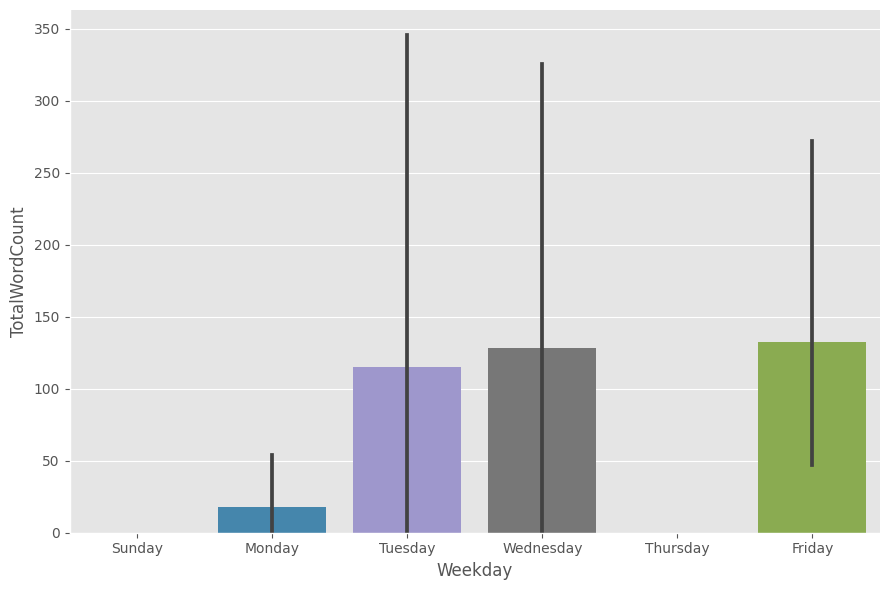

In [29]:
# bar plot wordcount of each weekday
# fig, ax = plt.subplots(figsize=(12, 6))
# dat_yn_raw_wc = dat_yn_raw[["Weekday", "WordCount"]].groupby("Weekday").sum().reset_index()
# dat_yn_raw_wc[["Weekday", "WordCount"]].plot(x="Weekday", y=["WordCount"], kind="bar", rot=90, ax=ax)
# plt.ylabel('WordCount Sum')

sns.catplot(x="Weekday", y="TotalWordCount", kind="bar", data=dat, ci=95, height=6, aspect=1.5)


# Working hours

/var/folders/fl/4b_jqvfn04s7k0xkwng1489c0000gr/T/ipykernel_65363/4074798334.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_extra.rename(columns={'ExtraTime (h)': 'SpentTime/h'}, inplace=True)
/var/folders/fl/4b_jqvfn04s7k0xkwng1489c0000gr/T/ipykernel_65363/4074798334.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_extra['TaskIndex'] = 'Extra'
/var/folders/fl/4b_jqvfn04s7k0xkwng1489c0000gr/T/ipykernel_65363/4074798334.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

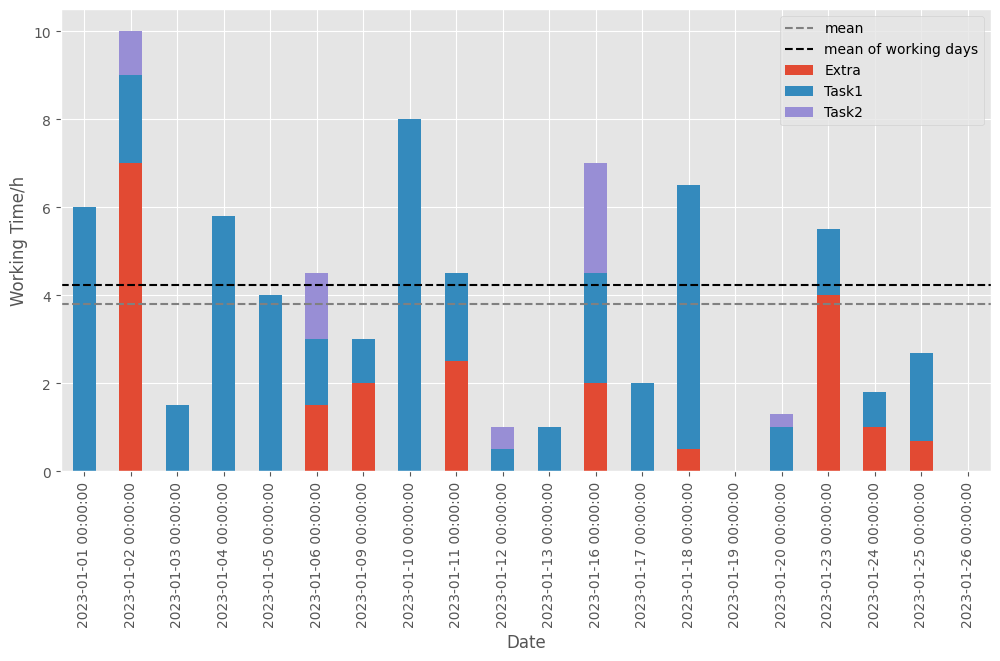

In [17]:
dat_extra = dat[['WeekCount', 'Date', 'Weekday', "ExtraEvent", "ExtraTime (h)"]]

dat_extra.rename(columns={'ExtraTime (h)': 'SpentTime/h'}, inplace=True)
dat_extra['TaskIndex'] = 'Extra'
dat_extra['Type'] = 'Extra'



# concat it with the dat
dat_st = pd.concat([dat_task, dat_extra], axis=0)

# plot stacked bar chart of Time of each day, colored by TaskIndex
fig, ax = plt.subplots(figsize=(12, 6))
dat_time = dat_st[["Date", "TaskIndex", "SpentTime/h"]].groupby(["Date", "TaskIndex"]).sum().reset_index()
dat_time.pivot(index="Date", columns= "TaskIndex", values="SpentTime/h").plot(kind="bar", rot=90, ax=ax, stacked=True)
plt.ylabel('Working Time/h')

plt.axhline(y=dat_time.groupby("Date")["SpentTime/h"].sum().mean(), color='gray', linestyle='--', label='mean')
plt.axhline(y=dat_time[dat_time["SpentTime/h"] != 0].groupby("Date")["SpentTime/h"].sum().mean(), color='black', linestyle='--', label='mean of working days')

plt.legend()
plt.show()

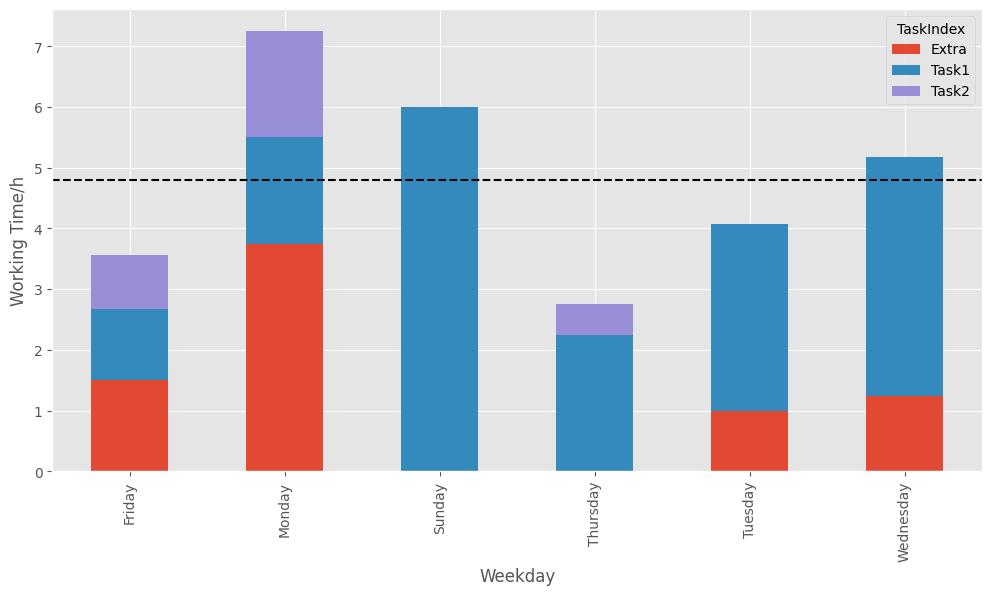

In [47]:

# plot stacked bar chart of Time of each day, colored by TaskIndex
fig, ax = plt.subplots(figsize=(12, 6))
# dat_time = dat_st[["Weekday", "TaskIndex", "SpentTime/h"]].groupby(["Weekday", "TaskIndex"]).sum().reset_index()
# dat_time = dat_st[["Weekday", "TaskIndex", "SpentTime/h"]].groupby(["Weekday", "TaskIndex"]).mean().reset_index()
dat_time = dat_st[dat_st["SpentTime/h"] != 0][["Weekday", "TaskIndex", "SpentTime/h"]].groupby(["Weekday", "TaskIndex"]).mean().reset_index()

dat_time.pivot(index="Weekday", columns= "TaskIndex", values="SpentTime/h").plot(kind="bar", rot=90, ax=ax, stacked=True)
plt.ylabel('Working Time/h')

plt.axhline(y=dat_time.groupby("Weekday")["SpentTime/h"].sum().mean(), color='black', linestyle='--', label='mean')

<AxesSubplot: ylabel='SpentTime/h'>

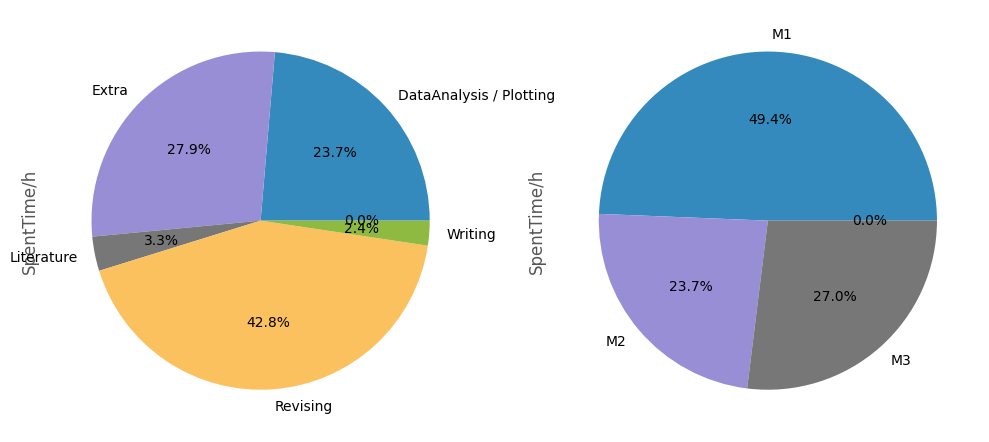

In [48]:
# plot pie chart - time spent on each task type
fig, axes = plt.subplots(figsize=(12, 6), ncols=2)
dat_st.groupby('Type')['SpentTime/h'].sum().plot.pie(autopct='%1.1f%%', ax=axes[0])
dat_st.groupby('Manuscript')['SpentTime/h'].sum().plot.pie(autopct='%1.1f%%', ax=axes[1])

In [10]:
dat_task_1_planned = dat[['WeekCount', 'Date', 'Weekday', 
                    'Task1', 'Manuscript1', 'TaskType1', 'PlannedTime1 (h)']]
dat_task_2_planned = dat[['WeekCount', 'Date', 'Weekday', 
                    'Task2', 'Manuscript2', 'TaskType2', 'PlannedTime2 (h)']]
dat_task_1_planned.columns = ['WeekCount', 'Date', 'Weekday', 'Task','Manuscript', 'Type', 'PlannedTime/h']
dat_task_1_planned['TaskIndex'] = 'Task1'
dat_task_2_planned.columns = ['WeekCount', 'Date', 'Weekday', 'Task', 'Manuscript', 'Type', 'PlannedTime/h']
dat_task_2_planned['TaskIndex'] = 'Task2'
# concat the two df vertically
dat_task_planned = pd.concat([dat_task_1_planned, dat_task_2_planned], axis=0)

# fill nan with 0 in the column 'PlannedTime/h'
dat_task_planned['PlannedTime/h'] = dat_task_planned['PlannedTime/h'].fillna(0)
dat_task_planned.sort_values(by=['WeekCount', 'Date', 'TaskIndex'], inplace=True)

/var/folders/fl/4b_jqvfn04s7k0xkwng1489c0000gr/T/ipykernel_65363/2294476204.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_task_1_planned['TaskIndex'] = 'Task1'
/var/folders/fl/4b_jqvfn04s7k0xkwng1489c0000gr/T/ipykernel_65363/2294476204.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_task_2_planned['TaskIndex'] = 'Task2'


<AxesSubplot: xlabel='Date'>

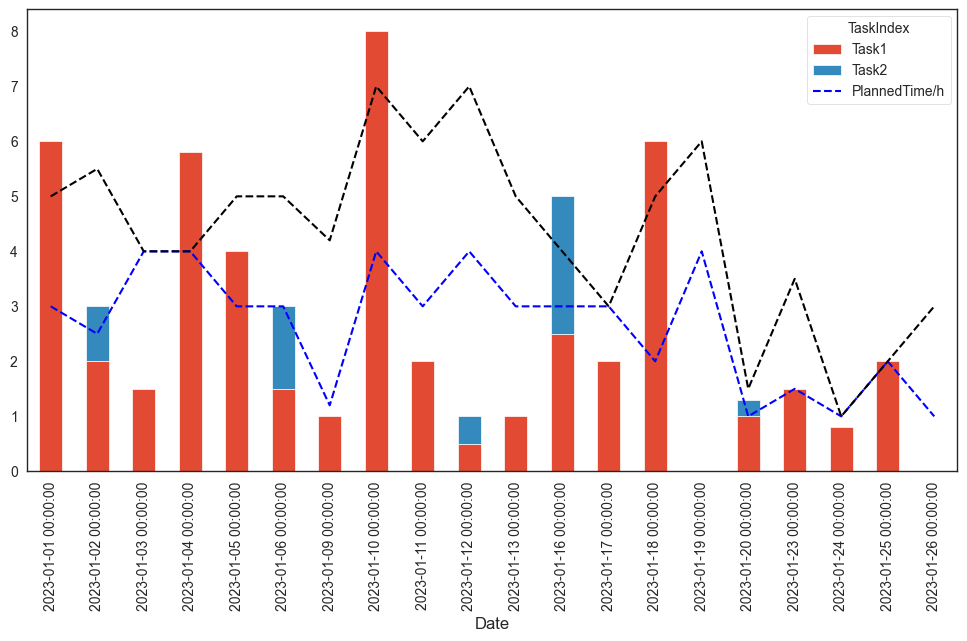

In [69]:

fig, ax = plt.subplots(figsize=(12, 6))
dat_time = dat_st[["Date", "TaskIndex", "SpentTime/h"]].groupby(["Date", "TaskIndex"]).sum().reset_index().query("TaskIndex!='Extra'")

dat_time_pivot = dat_time.pivot(index="Date", columns= "TaskIndex", values="SpentTime/h")
dat_time_pivot.plot(kind="bar", ax=ax, rot=90, stacked=True, zorder=0)

dat_task_planned[dat_task_planned['TaskIndex']=='Task1'][['PlannedTime/h']].plot(kind="line", ax=ax, rot=90,
                      color='blue', linestyle='--', label='Tasks planned', zorder=2)
# dat_task_planned[['PlannedTime/h']].plot(kind="line", ax=ax, rot=90,
#                       color='black', linestyle='--', label='Tasks planned', zorder=3)

dat_task_planned.groupby('Date')['PlannedTime/h'].sum().reset_index()['PlannedTime/h'].plot(kind="line", ax=ax, rot=90,
                        color='black', linestyle='--', label='Tasks total planned', zorder=3)